In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

## Read files

In [479]:
mort = pd.read_excel(r"E:\Data science\DataHack\Skillenza\Stage 4 Level 2\training_data.xlsx")
mort_test = pd.read_excel(r"E:\Data science\DataHack\Skillenza\Stage 4 Level 2\test_data.xlsx")

In [480]:
mort = mort.iloc[:,0:55]

In [481]:
mort.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Average temperature (celsius),Max temperature (celsius),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Disease Severity Asymptomatic,Disease Severity General,Disease Severity Severe,Disease Severity Critical,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Hemoglobin (g/L) - Median,Hemoglobin (g/L) - LQ,Hemoglobin (g/L) - UQ,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,NaN,NaN,0.0168,0.1200,0.9400,NaN,NaN,0.2900,0.7900,NaN,NaN,0.2300,0.1500,0.2303,0.0471,0.0400,NaN,NaN,0.3770,0.3455,0.2775,6.2,4.5,9.5,1.0,0.6,1.3,206.0,155.0,262.0,128.0,119.0,140.0,32.3,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,NaN,NaN,0.0370,0.2037,0.9444,NaN,NaN,0.6296,0.7222,NaN,NaN,0.2593,0.1481,0.2778,0.0370,0.0556,NaN,NaN,0.0000,0.2222,0.7778,9.8,6.9,13.9,0.6,0.5,0.8,165.5,107.0,229.0,126.0,115.0,138.0,29.1,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,NaN,NaN,0.0000,0.0803,0.9416,NaN,NaN,0.1606,0.8175,NaN,NaN,0.2190,0.1533,0.2117,0.0511,0.0292,NaN,NaN,0.5255,0.3942,0.0803,5.2,4.3,7.7,1.1,0.8,1.5,220.0,168.0,271.0,128.0,120.0,140.0,33.6,27.0,NaN,0.9343,0.2117,0.1168,0.0073,0.0073,7,12,0
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,0.0300,NaN,0.065,NaN,NaN,0.9150,36.5,NaN,0.1880,NaN,NaN,NaN,NaN,NaN,NaN,0.0206,0.0425,0.010,NaN,NaN,NaN,NaN,7.0,5.1,9.4,0.9,0.6,1.2,207.0,158.0,284.0,NaN,NaN,NaN,NaN,33.0,34.0,0.9500,0.4700,0.0051,0.0468,0.0365,10,15,0.16
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,0.0510,NaN,0.051,NaN,NaN,0.8990,36.5,NaN,0.2160,NaN,NaN,NaN,NaN,NaN,NaN,0.0420,0.0950,0.021,NaN,NaN,NaN,NaN,7.3,5.3,9.6,0.8,0.6,1.4,201.0,155.0,287.0,NaN,NaN,NaN,NaN,33.0,33.0,0.9490,0.9490,0.0000,0.0320,0.0110,6,14,0.15


In [482]:
mort.describe()

,ID,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Average temperature (celsius),Max temperature (celsius),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Disease Severity Asymptomatic,Disease Severity General,Disease Severity Severe,Disease Severity Critical,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Hemoglobin (g/L) - Median,Hemoglobin (g/L) - LQ,Hemoglobin (g/L) - UQ,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection
count,475.000000,252.000000,430.000000,222.00000,309.000000,325.000000,295.000000,262.000000,233.000000,192.000000,173.000000,250.000000,199.000000,356.000000,64.000000,54.000000,38.000000,340.000000,243.000000,175.000000,160.000000,197.000000,221.000000,260.000000,171.000000,81.000000,167.00000,229.000000,214.000000,199.000000,284.000000,253.000000,251.000000,289.000000,237.000000,237.000000,180.000000,162.000000,162.000000,134.000000,123.000000,123.000000,113.000000,184.000000,176.000000,148.000000,199.000000,76.000000,101.000000,43.000000
mean,94.324211,51.093536,0.547413,0.48413,0.286662,0.147790,0.142180,0.066283,0.075804,0.037113,0.104421,0.044744,0.160487,0.706176,36.474891,38.408778,0.234295,0.603716,0.288274,0.121554,0.275512,0.225184,0.330612,0.144762,0.107010,0.117175,0.07853,0.516531,0.304105,0.303799,6.058345,4.751225,7.706295,1.587924,1.381983,2.058692,186.339222,145.298519,233.919198,125.731493,111.824878,133.465447,37.866195,29.788370,34.728409,0.739702,0.842674,0.095805,0.105184,0.114935
std,51.058213,18.572915,0.263608,0.35929,0.288207,0.201715,0.241088,0.150995,0.212610,0.090475,0.450986,0.116095,0.269377,0.298083,6.567408,0.724731,0.300278,0.285895,0.301333,0.185448,0.257751,0.275312,0.280192,0.253176,0.216675,0.199007,0.24972,0.444439,0.388665,0.436035,2.196594,2.049314,3.331050,3.320552,3.316809,3.720481,38.775387,46.873641,55.891596,25.954569,31.130855,34.388297,6.857566,17.178765,20.741019,0.317250,0.276362,0.186147,0.164716,0.186450
min,1.000000,0.170000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.341000,36.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.290000,1.290000,1.290000,0.060000,0.200000,0.260000,77.000000,30.000000,86.000000,6.710000,0.000000,13.200000,4.500000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.500000,43.300000,0.451175,0.18050,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.565000,37.072500,38.025000,0.015000,0.459750,0.033000,0.000000,0.090175,0.027800,0.090000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.800000,3.600000,5.900000,0.780000,0.600000,1.000000,165.000000,118.000000,206.587500,124.000000,110.200000,135.445000,33.700000,21.000000,25.950000,0.537375,0.842000,0.000000,0.000000,0.000000
50%,96.000000,52.450000,0.540600,0.40075,0.206000,0.101000,0.060500,0.017950,0.008000,0.000000,0.011000,0.000000,0.053000,0.791350,37.571000,38.500000,0.150000,0.644500,0.164000,0.065000,0.248500,0.119000,0.310800,0.063000,0.040000,0.025000,0.00000,0.588800,0.099500,0.000000,5.400000,4.130000,7.110000,0.980000,0.730000,1.380000,184.485000,136.000000,229.000000,130.000000,118.000000,143.940000,38.400000,26.000000,30.000000,0.917

In [483]:
# Train Test ID column Overlap
# ****************************

for cols in mort.columns:
    if cols not in ['Mortality']:
        overlap = set(mort[cols]) & set(mort_test[cols])
        print(cols," overlap with test data is ", len(overlap))
        print("Values are ",overlap)
        print("\n")

ID  overlap with test data is  2
Values are  {155, 182}


Severity  overlap with test data is  5
Values are  {'All', 'Severe/critical only', 'Both', 'Severe/Critical Only', 'Mild only'}


Ventilation  overlap with test data is  4
Values are  {nan, 'Non-ventilation only', 'Ventilation only', 'Both'}


Mean Age  overlap with test data is  12
Values are  {67.5, 67.0, 37.0, 69.0, 40.0, 44.0, 45.0, 49.0, 49.4, 50.5, 59.0, 62.0}


% Male  overlap with test data is  22
Values are  {0.75, 0.79, 0.588, 0.68, 1.0, 0.0, 0.468, 0.625, 0.603, 0.6, 0.555, 0.52, 0.44, 0.514, 0.62, 0.47, 0.55, 0.486, 0.64, 0.73, 0.49, 0.692}


Any Comorbidity  overlap with test data is  3
Values are  {0.68, 0.0, 0.39}


Hypertension  overlap with test data is  6
Values are  {0.25, 0.26, 0.1, 0.34, 0.0, 0.172}


Diabetes  overlap with test data is  14
Values are  {0.061, 0.25, 0.05, 0.0, 0.106, 0.5, 0.17, 0.1, 0.21, 0.252, 0.081, 0.07, 0.052, 0.14}


Cardiovascular Disease (incl. CAD)  overlap with test data is  16
Val

In [554]:
# Combine Train and Test for Data Preprocessing
# ****************************

full_df = mort.append(mort_test)
full_df.head(2)

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Average temperature (celsius),Max temperature (celsius),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhoea,Nausea or Vomiting,Loss of Appetite/Anorexia,Disease Severity Asymptomatic,Disease Severity General,Disease Severity Severe,Disease Severity Critical,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Hemoglobin (g/L) - Median,Hemoglobin (g/L) - LQ,Hemoglobin (g/L) - UQ,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Heart failure,Acute kidney injury (AKI),Secondary infection/ Bacterial infection,"ICU length of stay, days","Hospital length of stay, days",Mortality
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,NaN,NaN,0.0168,0.1200,0.9400,NaN,NaN,0.2900,0.7900,NaN,NaN,0.2300,0.1500,0.2303,0.0471,0.0400,NaN,NaN,0.377,0.3455,0.2775,6.2,4.5,9.5,1.0,0.6,1.3,206.0,155.0,262.0,128.0,119.0,140.0,32.3,30.0,NaN,0.9476,0.2147,0.2304,0.1466,0.1466,8,11,0.28
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,NaN,NaN,0.0370,0.2037,0.9444,NaN,NaN,0.6296,0.7222,NaN,NaN,0.2593,0.1481,0.2778,0.0370,0.0556,NaN,NaN,0.000,0.2222,0.7778,9.8,6.9,13.9,0.6,0.5,0.8,165.5,107.0,229.0,126.0,115.0,138.0,29.1,40.0,NaN,0.9815,0.2222,0.5185,0.5000,0.5000,8,7.5,1


In [555]:
mort.shape , mort_test.shape , full_df.shape

((475, 55), (53, 54), (528, 55))

In [556]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 52
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        528 non-null    int64  
 1   Severity                                  511 non-null    object 
 2   Ventilation                               347 non-null    object 
 3   Mean Age                                  288 non-null    float64
 4   % Male                                    475 non-null    float64
 5   Any Comorbidity                           236 non-null    float64
 6   Hypertension                              335 non-null    float64
 7   Diabetes                                  355 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        330 non-null    float64
 9   Chronic obstructive lung (COPD)           286 non-null    float64
 10  Cancer (Any)                           

In [557]:
print(set(full_df.Mortality))

{0.28, 1, 0, 0.07, 0.06, 0.25, 0.64, 0.79, 0.38, 0.55, 0.67, 0.5, 0.42, 0.34, 0.58, nan, 0.51, 0.76, 0.26, 0.18, 0.35, 0.6, 0.11, 0.52, 0.05, 0.27, 0.19, 0.36, 0.04, 0.7, 0.45, 0.2, 0.12, 0.62, 0.29, 0.15, 0.16, 0.17, 0.22, 0.1, 0.03, 0.23, 0.09, 0.21, 0.54, 0.63, 0.3, 0.47, 0.02, 0.14, 0.39, 0.08, 0.48, 0.56, 'na', 0.4, '0%%', 0.9, 0.01, 0.32, 0.49, 0.41, 0.66}


In [558]:
print(set(full_df['Hospital length of stay, days']))

{nan, 0, 2, nan, 4, 5, 6.5, 7.5, 8.4, 8.6, 10, 11, 12, 13, 14, 15, 16, 17, 18.5, 14.5, 18, 19.5, 13.8, 23.2, 16.4, 17.22, 17.41, 19.43, 20, 26.5, 21.25, 23, 30, 27.5, 28, 26, 7, 31, nan, 39, nan, 8, 9, 9.5, 10.5, 51, 53, 55, 11.5, 12.71, 12.5, 13.5, nan, 15.14, nan, nan, nan, nan, 16.68, 16.5, nan, nan, 5.36, 19, 20.1, 21, 21.9, 22, 22.5, 24.9, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 11.4, 12.9, 14.94, 15.08, 15.4, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 9.27, 10.45, 11.2, 11.16, 12.2, 12.7, nan, nan, nan, nan, nan, 14.8, nan, nan, nan, nan, 15.7, 16.63, 17.81, 17.27, 18.3, 7.31, 20.8, 23.7, nan, nan, nan, nan, 25.3, 4.6, 10.56, 11.6, 12.67, 'na'}


In [559]:
# Impute Missing values in Mortality
# **********************************
# 1. na = 0.17857
# 2. 0%% = 0
# 3. nan = median

full_df.Mortality = np.where(full_df.Mortality.isin(['0%%']) , 0 , full_df.Mortality)
full_df.Mortality = np.where(full_df.Mortality.isin(['na']) , 0.18 , full_df.Mortality)
full_df.Mortality = full_df.Mortality.fillna(full_df.Mortality.median())

full_df.Mortality.isnull().sum()

0

In [560]:
# Replacing na in Hospital stay length (Missing value imputation for this column is done afterwards.)
# **********************************

full_df['Hospital length of stay, days'] = np.where(full_df['Hospital length of stay, days'].isin(['na']) , 0 ,
                                                   full_df['Hospital length of stay, days'])

In [561]:
# Converting Mortality and Hospital Stay Data type
# **********************************

full_df.Mortality = full_df.Mortality.astype('float64')
full_df['Hospital length of stay, days'] = full_df['Hospital length of stay, days'].astype('float64')

## Missing Value Percentage

In [562]:
null_perc = pd.DataFrame({'Features':full_df.columns , 'null %': full_df.isnull().sum().values / len(full_df)})
null_perc.head(55)

,Features,null %
0,ID,0.000000
1,Severity,0.032197
2,Ventilation,0.342803
3,Mean Age,0.454545
4,% Male,0.100379
5,Any Comorbidity,0.553030
6,Hypertension,0.365530
7,Diabetes,0.327652
8,Cardiovascular Disease (incl. CAD),0.375000
9,Chronic obstructive lung (COPD),0.458333


In [563]:
# Features to be dropped (Based on Missing value percentage):
# *********************************
drop = list(null_perc.Features[null_perc['null %']>0.80])
full_df.drop(columns = drop , inplace = True)

In [564]:
drop

['Average temperature (celsius)',
 'Max temperature (celsius)',
 'Respiratory rate > 24 breaths per min',
 'Loss of Appetite/Anorexia',
 'Heart failure',
 'Secondary infection/ Bacterial infection',
 'ICU length of stay, days']

## Categorical variables

In [568]:
cat = [cols for cols in full_df.columns if (full_df[cols].dtypes == 'O') & (cols not in ['ID']) ]
cat

['Severity', 'Ventilation']

In [569]:
# Imputing missing values
# ***************************

for cols in cat:
    full_df[cols] = full_df[cols].fillna('missing')

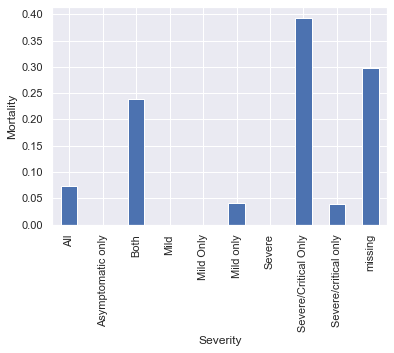

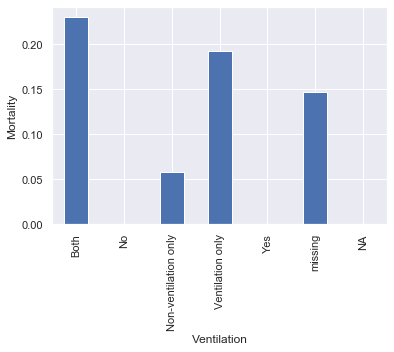

In [570]:
for cols in cat:
    full_df.groupby(cols)['Mortality'].mean().plot.bar()
    plt.xlabel(cols)
    plt.ylabel('Mortality')
    plt.show()

## Numeric Variables

In [571]:
numcols = list(full_df.select_dtypes(exclude = ['object']).columns)
numcols.remove('ID')

Dataset consists of various diseases patients are suffering from(value is in percentage), different tests
performed for diagnosis and symptoms(in percentage). 

Missing values in various tests columns are present because particular tests may not be needed to detect a certain disease or patient might have normal test report so data entry is not done for these columns. Considering this, we can impute 
ideal range for these tests. Mean/median of these columns falls in the ideal range so decided to impute mean/median.

Whereas in diseases columns, values are given in percentage which indicates, x% of patients are suffering from particular
disease. So, missing value in these columns can be interpreted as patients might not be suffering. So, we can impute zeros in these columns. Same is the case for Symptom columns.

In [573]:
# 0.80
median_impute = ['Platelet Count (10^9/L) - LQ' , 'Platelet Count (10^9/L) - UQ' , 'Platelet Count (10^9/L) - Median',
                'Lymphocyte Count (10^9/L) - UQ', 'Lymphocyte Count (10^9/L) - LQ', 'Lymphocyte Count (10^9/L) - Median',
                'White Blood Cell Count (10^9/L) - LQ' , 'White Blood Cell Count (10^9/L) - UQ' , 'White Blood Cell Count (10^9/L) - Median',
                'Hemoglobin (g/L) - Median','Hemoglobin (g/L) - LQ','Hemoglobin (g/L) - UQ','% Male' , 'Mean Age', 'Alanine Aminotransferase (U/L)' , 
                'Aspartate Aminotransferase (U/L)','Hospital length of stay, days','Albumin (g/L)']
for cols in median_impute:
    # replace by using median since there are outliers.
    median = full_df[cols].median()
    full_df[cols].fillna(median,inplace = True)
full_df[median_impute].isnull().sum()

Platelet Count (10^9/L) - LQ                0
Platelet Count (10^9/L) - UQ                0
Platelet Count (10^9/L) - Median            0
Lymphocyte Count (10^9/L) - UQ              0
Lymphocyte Count (10^9/L) - LQ              0
Lymphocyte Count (10^9/L) - Median          0
White Blood Cell Count (10^9/L) - LQ        0
White Blood Cell Count (10^9/L) - UQ        0
White Blood Cell Count (10^9/L) - Median    0
Hemoglobin (g/L) - Median                   0
Hemoglobin (g/L) - LQ                       0
Hemoglobin (g/L) - UQ                       0
% Male                                      0
Mean Age                                    0
Alanine Aminotransferase (U/L)              0
Aspartate Aminotransferase (U/L)            0
Hospital length of stay, days               0
Albumin (g/L)                               0
dtype: int64

In [574]:
# 0.80
zero_impute = ['Hypertension','Diabetes','Cardiovascular Disease (incl. CAD)','Chronic obstructive lung (COPD)',
              'Cancer (Any)','Liver Disease (any)','Cerebrovascular Disease','Chronic kidney/renal disease',
              'Other','Fever (temperature ≥37·3°C)','Cough','Shortness of Breath (dyspnoea)','Headache','Sputum (/Expectoration)',
              'Myalgia (Muscle Pain)','Fatigue','Diarrhoea','Nausea or Vomiting','Disease Severity Asymptomatic',
              'Disease Severity General','Disease Severity Severe','Disease Severity Critical','Antiviral (Any)',
              'Antibiotic' , 'Acute kidney injury (AKI)',]
for cols in zero_impute:
    full_df[cols].fillna(0,inplace = True)
full_df[zero_impute].isnull().sum()

Hypertension                          0
Diabetes                              0
Cardiovascular Disease (incl. CAD)    0
Chronic obstructive lung (COPD)       0
Cancer (Any)                          0
Liver Disease (any)                   0
Cerebrovascular Disease               0
Chronic kidney/renal disease          0
Other                                 0
Fever (temperature ≥37·3°C)           0
Cough                                 0
Shortness of Breath (dyspnoea)        0
Headache                              0
Sputum (/Expectoration)               0
Myalgia (Muscle Pain)                 0
Fatigue                               0
Diarrhoea                             0
Nausea or Vomiting                    0
Disease Severity Asymptomatic         0
Disease Severity General              0
Disease Severity Severe               0
Disease Severity Critical             0
Antiviral (Any)                       0
Antibiotic                            0
Acute kidney injury (AKI)             0


In [575]:
# 0.80
full_df['Add'] = full_df['Hypertension']+full_df['Diabetes']+full_df['Cardiovascular Disease (incl. CAD)']+full_df['Chronic obstructive lung (COPD)']+full_df['Cancer (Any)']+full_df['Chronic kidney/renal disease']+full_df['Liver Disease (any)']+full_df['Cerebrovascular Disease']+full_df['Other']

full_df['Any Comorbidity'][full_df.Add == 0] = full_df['Any Comorbidity'][full_df.Add == 0].fillna(0)
full_df['Any Comorbidity'][full_df.Add > 0] = full_df['Any Comorbidity'][full_df.Add > 0].fillna(0.4155)
                                                       
full_df.drop(columns= ['Add'], inplace = True)

## Distribution of each attribute

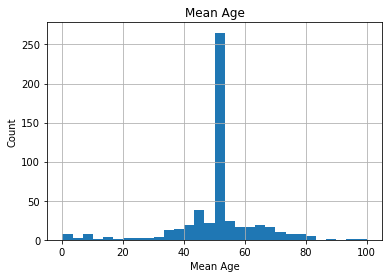

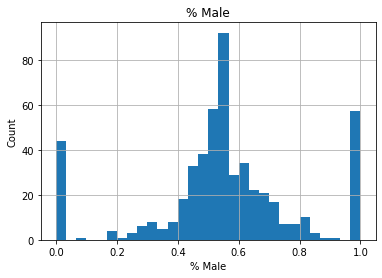

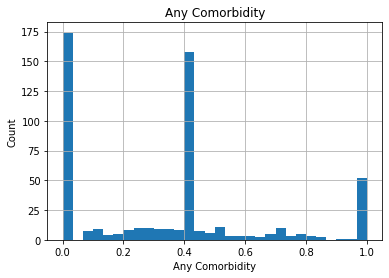

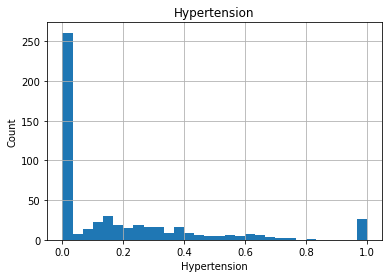

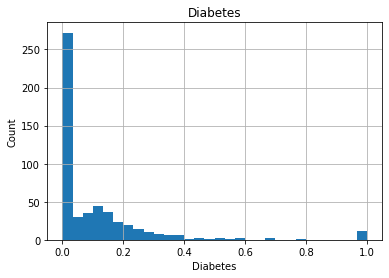

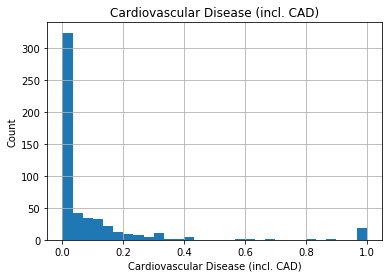

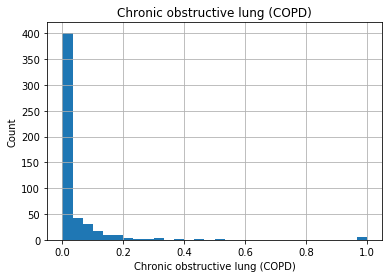

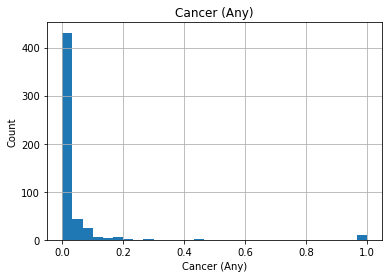

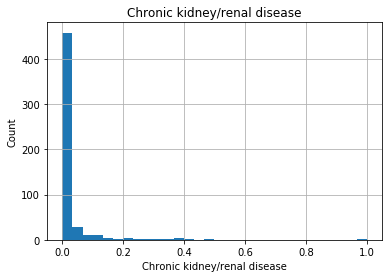

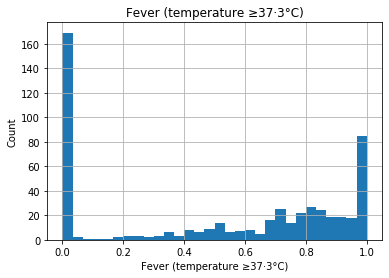

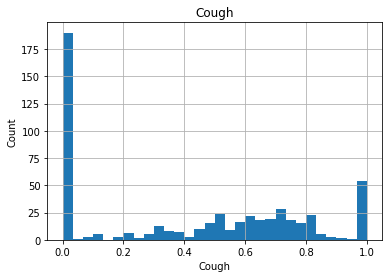

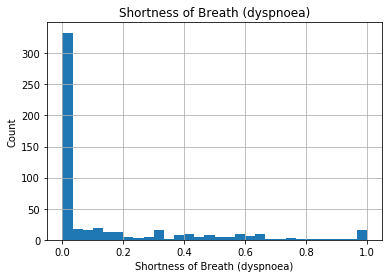

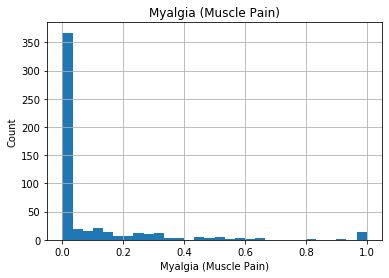

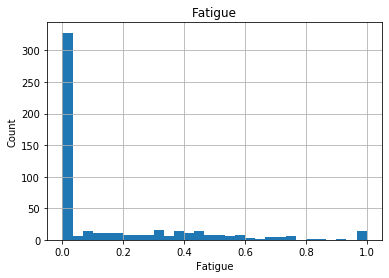

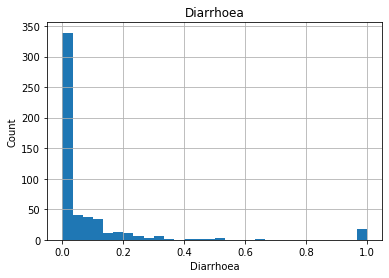

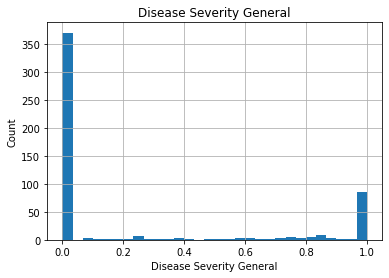

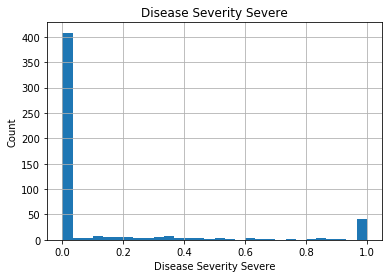

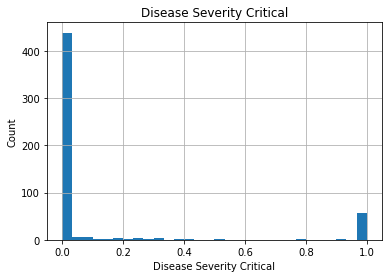

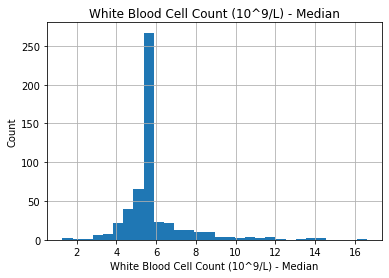

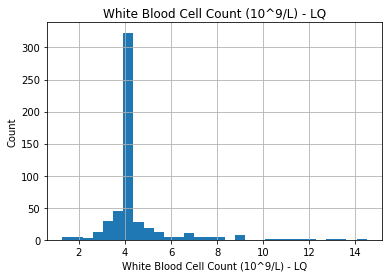

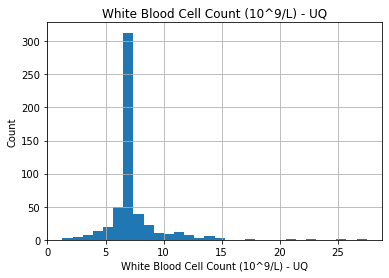

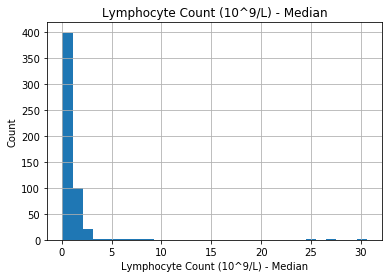

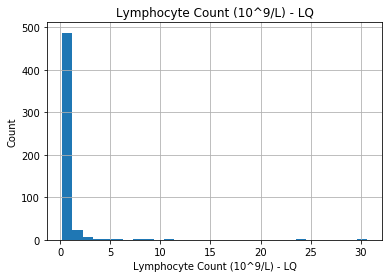

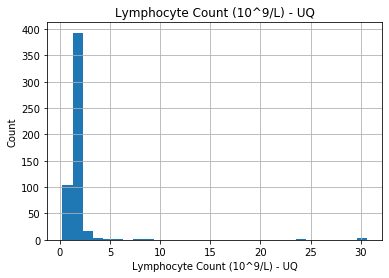

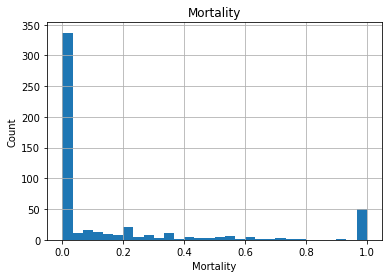

In [32]:
for cols in numcols[0:25]:
    full_df[cols].hist(bins= 30)
    plt.xlabel(cols)
    plt.ylabel("Count")
    plt.title(cols)
    plt.show()

## Log transformation

In [332]:
numcols.index('Mortality')

24

In [333]:
numcols.index('isna_Severity')

25

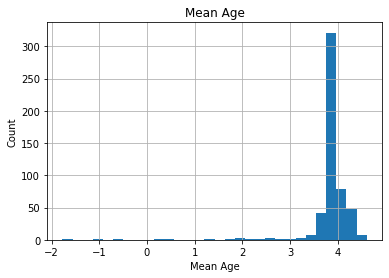

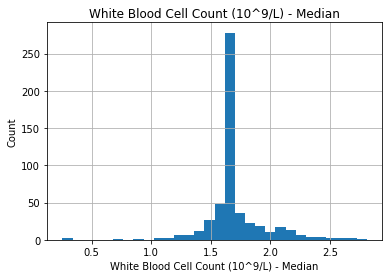

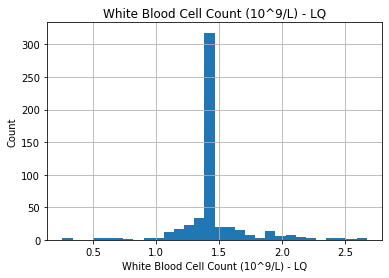

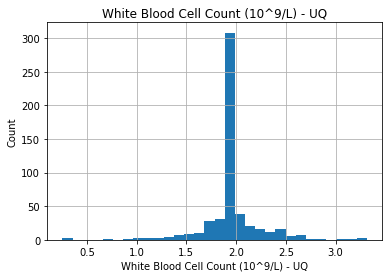

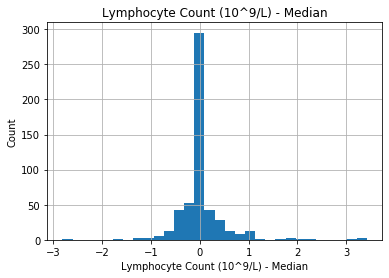

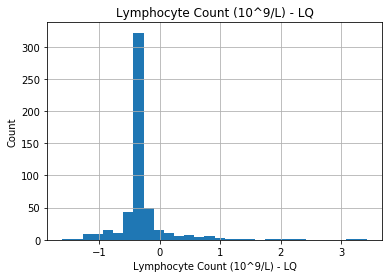

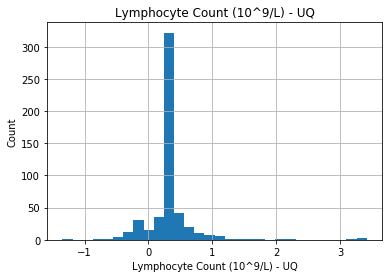

In [334]:
# for cols in numcols[0:24]: # Skipping Mortality
#     if 0 in full_df[cols].unique():
#         pass
#     else:
#         np.log(full_df[cols]).hist(bins= 30)
#         full_df[cols] = np.log(full_df[cols])        
#         plt.xlabel(cols)
#         plt.ylabel("Count")
#         plt.title(cols)
#         plt.show()

In [165]:
# full_df['Aspartate Aminotransferase (U/L)'] = 1 / full_df['Aspartate Aminotransferase (U/L)']
# full_df['Hypertension'] = full_df['Hypertension']**0.5

## Outliers

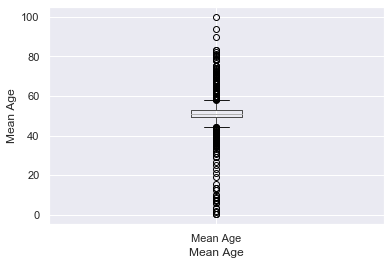

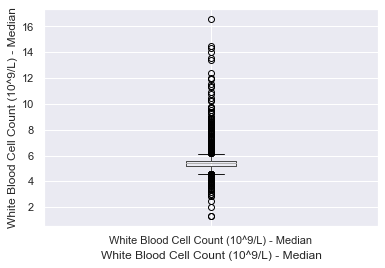

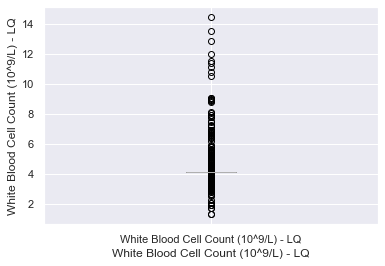

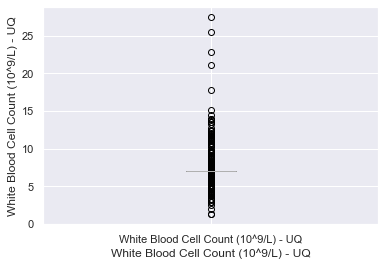

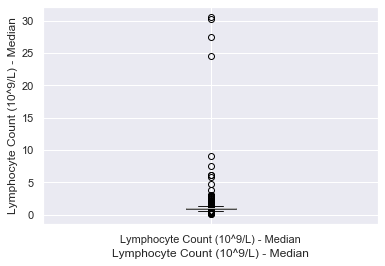

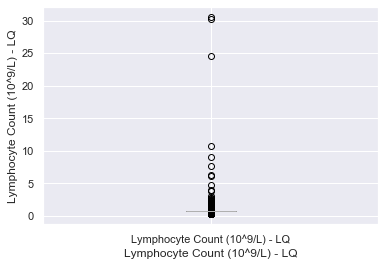

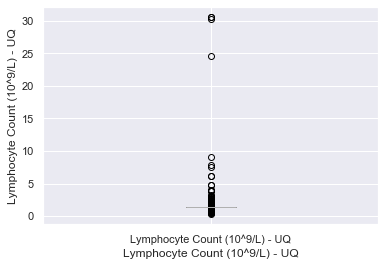

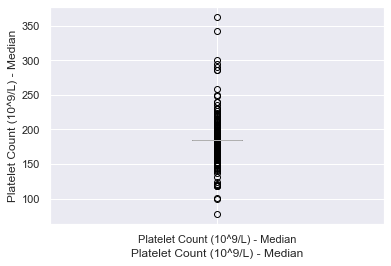

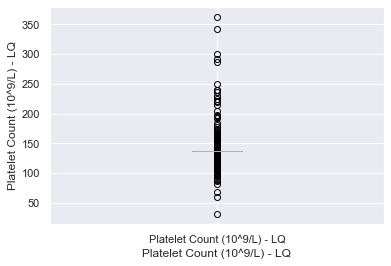

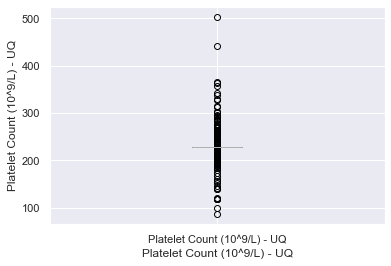

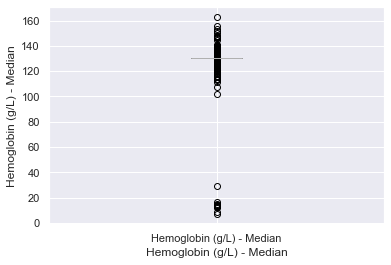

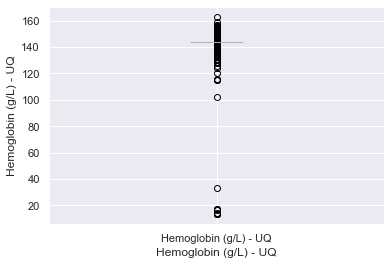

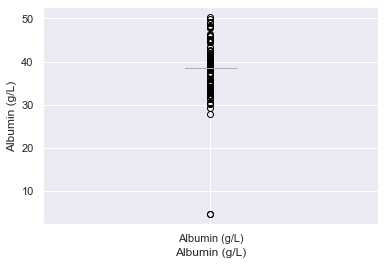

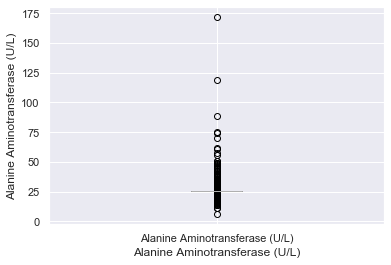

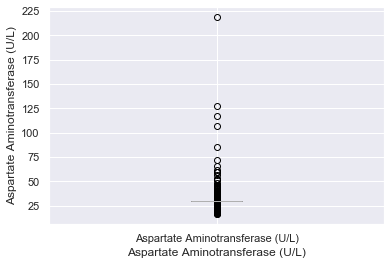

In [427]:
for cols in numcols:
    if 0 in full_df[cols].unique():
        pass
    else:
        full_df.boxplot(column = cols)
        plt.xlabel(cols)
        plt.ylabel(cols)
        plt.show()

## Feature Encoding

In [579]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
full_df[cat] = full_df[cat].apply(le.fit_transform)

In [509]:
# One hot encoding
full_df = pd.get_dummies(full_df , columns= cat)

### Seperating train and test files

In [580]:
train = full_df.iloc[0:475 , :]
test = full_df.iloc[475: ,:]

## Relation of Each attribute with Mortality

In [581]:
correlation = train.corr()
correlation

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhoea,Nausea or Vomiting,Disease Severity Asymptomatic,Disease Severity General,Disease Severity Severe,Disease Severity Critical,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Hemoglobin (g/L) - Median,Hemoglobin (g/L) - LQ,Hemoglobin (g/L) - UQ,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Acute kidney injury (AKI),"Hospital length of stay, days",Mortality
ID,1.000000,0.046275,-0.180881,-0.025396,0.057967,0.031679,0.031850,0.020796,0.061596,0.013892,0.027081,0.008700,-0.066924,0.066852,-0.041205,-0.106340,0.025005,-0.011773,-0.082222,-0.050443,-0.030970,-0.139575,0.156765,0.088431,-0.062052,0.188752,0.191348,0.119567,-0.061123,0.047008,-0.125970,0.115421,0.116433,0.100625,0.005436,0.104135,-0.171207,-0.003742,0.012079,-0.000747,0.035373,-0.007608,-0.002015,-0.234970,-0.172048,-0.117065,0.040707,0.004839
Severity,0.046275,1.000000,0.076498,0.221093,0.063866,0.160080,0.185155,0.131633,0.154289,0.060840,0.065948,0.013308,0.083312,0.000133,0.103153,-0.101897,-0.127886,0.152058,-0.000395,-0.008154,-0.033758,-0.055972,-0.069875,0.054252,-0.016113,-0.078135,0.129527,0.357628,0.109936,0.129197,0.066160,-0.039340,-0.026264,-0.032194,-0.218041,-0.130153,-0.186190,-0.009101,0.077254,0.110454,-0.050867,0.035601,0.095631,-0.032967,-0.016627,0.087469,-0.007866,0.354581
Ventilation,-0.180881,0.076498,1.000000,-0.139304,-0.066298,-0.322130,-0.223315,-0.217004,-0.113217,-0.087070,-0.167753,-0.056947,-0.004613,0.034149,-0.139959,0.045842,-0.071761,0.020235,0.056532,-0.107372,-0.042531,-0.046738,-0.036318,-0.005698,0.071029,0.033489,0.078214,-0.034983,0.001884,0.029306,0.023322,-0.040066,-0.035549,-0.035332,0.114125,0.117621,0.079731,-0.019683,0.048461,0.012409,0.110641,-0.059065,-0.097807,-0.087770,0.015834,-0.049202,0.146083,-0.167989
Mean Age,-0.025396,0.221093,-0.139304,1.000000,-0.031477,0.505853,0.405718,0.340803,0.434649,0.238201,0.104167,-0.040085,0.137769,0.235217,0.212677,-0.112208,-0.098706,0.108340,-0.017679,-0.019965,0.047510,-0.050351,-0.220991,-0.019376,-0.062273,-0.068188,0.078539,0.148496,-0.076432,-0.150267,0.014238,-0.192033,-0.198603,-0.184009,-0.378004,-0.406097,-0.176774,-0.015993,-0.059028,0.063561,-0.217646,-0.095913,-0.049203,0.019618,0.016254,0.017173,-0.047863,0.409539
% Male,0.057967,0.063866,-0.066298,-0.031477,1.000000,0.010072,0.130440,-0.114263,0.082242,0.078452,-0.100391,0.103052,0.103994,0.081364,0.041862,0.085100,0.054147,0.105527,0.031756,0.125019,0.017626,0.038992,0.157628,0.053898,-0.024751,0.044773,0.107530,0.185051,0.130639,0.052114,0.113393,0.155436,0.156835,0.147368,-0.042408,-0.014543,-0.039045,-0.034131,-0.003193,-0.005498,-0.066780,0.077537,0.088865,0.090321,0.058955,0.123458,-0.030725,0.008834
Any Comorbidity,0.031679,0.160080,-0.322130,0.505853,0.010072,1.000000,0.536785,0.479296,0.460738,0.281911,0.259501,0.036048,0.117936,0.189668,0.420844,-0.078745,-0.074697,0.056414,-0.115359,-0.090024,0.014411,0.041966,-0.046913,-0.017495,-0.152188,-0.167813,-0.112367,0.126159,-0.008503,0.014384,-0.029494,-0.168609,-0.148264,-0.155153,-0.158719,-0.138939,-0.127544,-0.055927,-0.053449,-0.022855,-0.145305,-0.028415,0.064870,-0.010446,-0.097313,0.070057,-0.182664,0.490609
Hypertension,0.031850,0.185155,-0.223315,0.405718,0.130440,0.536785,1.000000,0.371958,0.413771,0.087030,0.233700,-0.003618,0.119754,0.125991,0.218894,-0.052032,-0.104160,0

In [582]:
correlation.to_excel('train correlation.xlsx')

FileCreateError: [Errno 13] Permission denied: 'train correlation.xlsx'

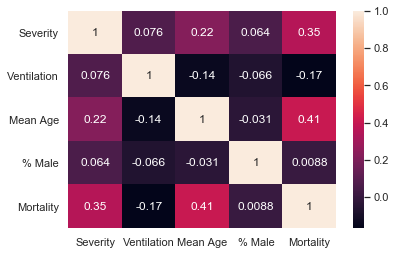

In [309]:
sns.heatmap(train.iloc[:,[1,2,3,4,47]].corr() , annot = True)

Multicollinear:
1. Any Comorbidity & Mean Age 0.51
2. Any Comorbidity & Hypertension 0.54
3. Any Comorbidity & Diabetes 0.48
4. Any Comorbidity & Cardiovascular Disease 0.46
5. Mean Age & Hypertension 0.41
6. Mean Age & Cardiovascular Disease 0.43
7. Hypertension & Cardiovascular Disease 0.41
8. Cough & fever 0.72
9. Sputum & fever 0.37
10. Cough & Sputum 0.43
11. Shortness of breath & sputum 0.34
12. White Blood Cell - Median with UQ and LQ 0.78 & 0.8
13. WBC LQ & UQ 0.54
14. Lymphocyte Count Median with LQ and UQ 0.95,0.99
15. Hemoglobin Median with LQ & UQ 0.49 , 0.44
16. Hemoglobin LQ & UQ 0.93
17. Platelate Median with LQ and UQ 0.77,0.70
18. Albumin & Hemoglobin Median 0.46
19. Antibiotic & Antiviral 0.51
20. Acute Kidney Injury & Antibiotic 0.37
21. Alanine Aminotransferase 0.74

## Feature Scaling

In [583]:
# MinMax Scaler
# *******************************
from sklearn.preprocessing import MinMaxScaler
feature_scale = [feature for feature in train.columns if feature not in ['ID','Mortality']]

for cols in feature_scale:
    scaler = MinMaxScaler() # We choose minmaxscaler or standard scaler whichever performing good on data.
    train[feature_scale] = scaler.fit_transform(train[feature_scale])
    
for cols in feature_scale:
    scaler = MinMaxScaler()
    test[feature_scale] = scaler.fit_transform(test[feature_scale])

In [584]:
train.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Liver Disease (any),Cerebrovascular Disease,Chronic kidney/renal disease,Other,Fever (temperature ≥37·3°C),Cough,Shortness of Breath (dyspnoea),Headache,Sputum (/Expectoration),Myalgia (Muscle Pain),Fatigue,Diarrhoea,Nausea or Vomiting,Disease Severity Asymptomatic,Disease Severity General,Disease Severity Severe,Disease Severity Critical,White Blood Cell Count (10^9/L) - Median,White Blood Cell Count (10^9/L) - LQ,White Blood Cell Count (10^9/L) - UQ,Lymphocyte Count (10^9/L) - Median,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Hemoglobin (g/L) - Median,Hemoglobin (g/L) - LQ,Hemoglobin (g/L) - UQ,Albumin (g/L),Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),Acute kidney injury (AKI),"Hospital length of stay, days",Mortality
0,1,0.000000,0.0,0.509166,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,0.0168,0.0,0.000000,0.0168,0.1200,0.9400,0.7900,0.0,0.0,0.2300,0.1500,0.2303,0.0471,0.0400,0.0,0.3770,0.3455,0.2775,0.320705,0.243182,0.313239,0.030779,0.013158,0.034278,0.451049,0.375375,0.422062,0.776057,0.730061,0.846462,0.605664,0.144578,0.068898,0.9476,0.2147,0.1466,0.200000,0.28
1,1,0.777778,0.0,0.509166,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,0.0000,0.0,0.000000,0.0370,0.2037,0.9444,0.7222,0.0,0.0,0.2593,0.1481,0.2778,0.0370,0.0556,0.0,0.0000,0.2222,0.7778,0.555846,0.425000,0.481114,0.017682,0.009868,0.017798,0.309441,0.231231,0.342926,0.763261,0.705521,0.833111,0.535948,0.204819,0.068898,0.9815,0.2222,0.5000,0.136364,1.00
2,1,0.000000,0.0,0.509166,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,0.0700,0.0,0.000000,0.0000,0.0803,0.9416,0.8175,0.0,0.0,0.2190,0.1533,0.2117,0.0511,0.0292,0.0,0.5255,0.3942,0.0803,0.255389,0.228030,0.244563,0.034054,0.019737,0.040870,0.500000,0.414414,0.443645,0.776057,0.736196,0.846462,0.633987,0.126506,0.068898,0.9343,0.2117,0.0073,0.218182,0.00
3,2,0.000000,0.0,0.509166,0.6030,0.4155,0.0000,0.1160,0.0000,0.0000,0.0300,0.0,0.011607,0.0000,0.0000,0.9150,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0206,0.0425,0.0,0.0000,0.0000,0.0000,0.372959,0.288636,0.309424,0.027505,0.013158,0.030982,0.454545,0.384384,0.474820,0.788854,0.724110,0.873164,0.738562,0.162651,0.088583,0.9500,0.4700,0.0468,0.272727,0.16
4,2,0.000000,0.0,0.509166,0.6160,0.4155,0.0000,0.1010,0.0000,0.0000,0.0510,0.0,0.009107,0.0000,0.0000,0.8990,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0420,0.0950,0.0,0.0000,0.0000,0.0000,0.392554,0.303788,0.317055,0.024231,0.013158,0.037574,0.433566,0.375375,0.482014,0.788854,0.724110,0.873164,0.738562,0.162651,0.083661,0.9490,0.9490,0.0320,0.254545,0.15


## Sampling

In [585]:
train_x = train.loc[:,train.columns!='Mortality']
train_y = train.loc[:,'Mortality']
train_x.drop(columns = 'ID' ,inplace = True)

In [366]:
## Checking distribution of val set and test data
# ***************************************
from sklearn.metrics import mean_squared_error

rmse = []
seeds = []
for seed in range(0,500,2):
    mort_train_x , mort_val_x , mort_train_y , mort_val_y = train_test_split(train_x,train_y,test_size = 0.2, 
                                                                               random_state=seed)
    df = pd.DataFrame()
    for cols in list(train_x.columns):
        if cols not in ['ID']:
            
            df = df.append(pd.DataFrame({'Features':[cols], 'Val_Set':[mort_val_x[cols].mean()],'Test_Data':[test[cols].mean()]}))
    rmse.append(np.sqrt(mean_squared_error(df.Val_Set , df.Test_Data)))
    seeds.append(seed)
#    print('Seed',seed,'RMSE for val set is {}'.format(np.sqrt(mean_squared_error(df.Val_Set , df.Test_Data))))
a = pd.DataFrame({'seeds':seed , 'rmse':rmse})
a[a.rmse == a.rmse.min()]

,seeds,rmse
246,498,0.106734


In [368]:
# Checking covariate shift
from sklearn.model_selection import train_test_split
mort_train_x , mort_val_x , mort_train_y , mort_val_y = train_test_split(train_x,train_y,test_size = 0.2, 
                                                                               random_state=498)
dataframe = pd.DataFrame()
for cols in list(train_x.columns):
        if cols not in ['ID']:
            
            dataframe = dataframe.append(pd.DataFrame({'Features':[cols], 'Val_Set':[mort_val_x[cols].mean()],'Test_Data':[test[cols].mean()]}))
dataframe

,Features,Val_Set,Test_Data
0,Severity,0.453801,0.219340
0,Ventilation,0.428070,0.215094
0,Mean Age,0.521392,0.572089
0,Disease Severity Critical,0.121990,0.069862
0,Aspartate Aminotransferase (U/L),0.070228,0.319114
0,Antiviral (Any),0.355196,0.216925
0,Acute kidney injury (AKI),0.015164,0.065358
0,"Hospital length of stay, days",0.257024,0.348428
0,Diseases,0.163200,0.285669
0,Symptoms,0.253791,0.258613


## Model Building

### RF

In [587]:
# RF
# ****************************
from sklearn.metrics import mean_squared_error
rf_base = RandomForestRegressor(max_features= "auto",random_state = 498)
rf_base.fit(mort_train_x , mort_train_y)
y_pred = rf_base.predict(mort_val_x) ; train_pred = rf_base.predict(mort_train_x)
print("RMSE for Test: ",round(np.sqrt(mean_squared_error(y_pred,mort_val_y)),7))
print("RMSE for Train:",round(np.sqrt(mean_squared_error(train_pred , mort_train_y)),7))

RMSE for Test:  0.2148395
RMSE for Train: 0.0761795


In [588]:
## On complete Train Data:
# ************************************
rf_complete = RandomForestRegressor(max_features= "auto",random_state = 100)
rf_complete.fit(train_x , train_y)
train_pred = rf_complete.predict(train_x)
round(np.sqrt(mean_squared_error(train_pred , train_y)),7)

0.0770351

## XGBoost

In [589]:
# XGBoost on sample
# ************************************
xb_base = XGBRegressor(learning_rate = 0.10 ,max_depth=3,random_state = 498)
xb_base.fit(mort_train_x , mort_train_y)
y_pred = xb_base.predict(mort_val_x) ; train_pred = xb_base.predict(mort_train_x)
print("RMSE for Test: ",round(np.sqrt(mean_squared_error(y_pred,mort_val_y)),7))
print("RMSE for Train:",round(np.sqrt(mean_squared_error(train_pred , mort_train_y)),7))

[03:53:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for Test:  0.2100113
RMSE for Train: 0.100481


In [45]:
# XGBoost on complete train_data
# *************************************
xb_ftrain = XGBRegressor(learning_rate = 0.10 ,max_depth=3)
xb_ftrain.fit(train_x , train_y)
train_pred = xb_ftrain.predict(train_x)
print("RMSE for Train:",round(np.sqrt(mean_squared_error(train_pred , train_y)),7))

[16:40:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for Train: 0.1092575


In [590]:
## train_reg_model
def train_reg_model(algo , train_x , test_x , train_y ,test_y, show_result = 'Y'):
    
    from sklearn.metrics import mean_squared_error    
    if(algo == 'rf'):
        
        from sklearn.ensemble import RandomForestRegressor
        
        rf = RandomForestRegressor(bootstrap=True,random_state=498)
        rf.fit(train_x,train_y)
        valid_pred = rf.predict(test_x) ; train_pred = rf.predict(train_x)
        RMSE_val = round(np.sqrt(mean_squared_error(valid_pred,test_y)),7)
        RMSE_train = round(np.sqrt(mean_squared_error(train_pred , train_y)),7)
        
        
            
    elif(algo == 'Xgboost'):
        
        from xgboost import XGBRegressor
        xgr = XGBRegressor(random_state=498)
        xgr.fit(train_x , train_y)
        valid_pred = xgr.predict(test_x) ; train_pred = xgr.predict(train_x)
        RMSE_val = round(np.sqrt(mean_squared_error(valid_pred,test_y)),7)
        RMSE_train = round(np.sqrt(mean_squared_error(train_pred , train_y)),7)
        
            
    elif(algo == 'LGBM'):
        
        from lightgbm import LGBMRegressor
        lgbr = LGBMRegressor()
        bst = lgbr.fit(train_x,train_y)
        valid_pred = bst.predict(test_x) ; train_pred = bst.predict(train_x)
        RMSE_val = round(np.sqrt(mean_squared_error(valid_pred,test_y)),7)
        RMSE_train = round(np.sqrt(mean_squared_error(train_pred , train_y)),7)
        
    elif(algo == 'LinearRegression'):
        from sklearn.linear_model import LinearRegression
        lr = LinearRegression()
        lr.fit(train_x,train_y)
        valid_pred = lr.predict(test_x) ; train_pred = lr.predict(train_x)
        RMSE_val = round(np.sqrt(mean_squared_error(valid_pred,test_y)),7)
        RMSE_train = round(np.sqrt(mean_squared_error(train_pred , train_y)),7)
        
    else:
        print("Enter Valid Algorithm")
        
    if(show_result == 'Y'):
        print("*****Training Model*****")
        print("RMSE for Validation: ",RMSE_val)
        print("RMSE for Train:",RMSE_train)

    
    return(RMSE_val , RMSE_train)

In [592]:
fi_xb = pd.DataFrame({'Features':train_x.columns,'FI':xb_base.feature_importances_}).sort_values('FI', ascending = False)
fi_xb.head()

,Features,FI
0,Severity,0.138475
4,Any Comorbidity,0.129787
30,Lymphocyte Count (10^9/L) - Median,0.074282
29,White Blood Cell Count (10^9/L) - UQ,0.070387
5,Hypertension,0.057816


In [593]:
# Backward Propogation on xgboost
improved_RMSE_val = []
improved_RMSE_train = []
best_RMSE_VAL = []
best_RMSE_TRAIN = []
Best_Features = []
removed = []
imp_features = list(fi_xb.Features)
k_val = 0.2100113 # Rmse score for xg baseline model
k_train = 0.100481
for col in list(fi_xb.Features):
    imp_features.remove(col)
    mt_x = train.loc[:,imp_features]
    mt_y = train.loc[:,'Mortality']
    mt_train_x , mt_test_x, mt_train_y , mt_test_y = train_test_split(mt_x , mt_y , test_size = 0.2 , 
                                                                          random_state = 498)

    RMSE_val , RMSE_train = train_reg_model('Xgboost' , mt_train_x , mt_test_x, mt_train_y , mt_test_y , show_result='N')
    if ((RMSE_val > k_val)):
        imp_features.append(col)
        
    else:
        removed.append(col)
        k_val = RMSE_val
        k_train = RMSE_train
        print("RMSE_val:",k_val,"RMSE_train:",k_train , "\nremoved:",removed,"\n")
        Best_Features = imp_features
        best_RMSE_VAL = k_val
        best_RMSE_TRAIN = k_train
        improved_RMSE_val.append(k_val)
        improved_RMSE_train.append(k_train)
print("Best_Features:",Best_Features,"\nBest_RMSE_val:",best_RMSE_VAL,"\nBest_RMSE_train:",best_RMSE_TRAIN)

[03:53:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE_val: 0.2030247 RMSE_train: 0.1039555 
removed: ['Severity'] 

[03:53:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE_val: 0.2027281 RMSE_train: 0.1052671 
removed: ['Severity', 'Lymphocyte Count (10^9/L) - Median'] 

[03:53:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE_val: 0.2014014 RMSE_train: 0.1066932 
removed: ['Severity', 'Lymphocyte Count (10^9/L) - Median', 'White Blood Cell Count (10^9/L) - UQ'] 

[03:53:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:s

In [613]:
from sklearn.model_selection import train_test_split

x_train = train.loc[:,Best_Features]
y_train = train.iloc[:,train.columns =='Mortality']


mrt_train_x , mrt_val_x , mrt_train_y , mrt_val_y = train_test_split(x_train , y_train, test_size = 0.2, 
                                                                               random_state=498)

# Xgboost
# Final Model
xb_final = XGBRegressor(random_state = 498,learning_rate = 0.1,n_estimators=160)
xb_final.fit(mrt_train_x , mrt_train_y)
y_pred = xb_final.predict(mrt_val_x); train_pred = xb_final.predict(mrt_train_x)
print("RMSE for Test: ",round(np.sqrt(mean_squared_error(y_pred,mrt_val_y)),7))
print("RMSE for Train:",round(np.sqrt(mean_squared_error(train_pred , mrt_train_y)),7))

[04:00:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for Test:  0.1875229
RMSE for Train: 0.0850413


In [614]:
# Final model On complete train data
xb_final.fit(x_train , y_train)
train_pred = xb_final.predict(x_train)
print("RMSE for Train:",round(np.sqrt(mean_squared_error(train_pred , y_train)),7))

[04:01:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for Train: 0.0968835


## Submission

In [392]:
test.drop(columns = ['Mortality' , 'ID'],inplace = True)

In [394]:
sub = pd.DataFrame({'ID':mort_test.ID , 'Mortality':0})
sub.head()

,ID,Mortality
0,155,0
1,156,0
2,156,0
3,156,0
4,157,0


In [616]:
sub['Mortality'] = xb_final.predict(test.loc[:,Best_Features])
sub.head(20)

,ID,Mortality
0,155,0.089999
1,156,0.145141
2,156,0.394277
3,156,0.136000
4,157,0.198534
5,157,0.007656
6,157,0.154913
7,157,0.449921
8,158,-0.007352
9,158,0.004178


In [617]:
excel = pd.ExcelWriter('mort15.xlsx')
sub.to_excel(excel)
excel.save()